Комп'ютерний практикум 2
0. Уважно прочитати методичні вказівки до виконання комп’ютерного практикуму.
1. Самостійно підібрати текст для шифрування (2-3 кб) та ключі довжини r = 2, 3, 4, 5, а також довжини 10-20 знаків. Зашифрувати обраний відкритий текст шифром Віженера з цими ключами.
2. Підрахувати індекси відповідності для відкритого тексту та всіх одержаних шифртекстів і порівняти їх значення.
3. Використовуючи наведені теоретичні відомості, розшифрувати наданий шифртекст (згідно свого номеру варіанта).

In [60]:
#Імпорти
import matplotlib.pyplot as plt


In [61]:
def clear_text(text:str) -> str:
    text = text.lower().replace("ё", "е").replace(".", "").replace(",", "").replace("-", "").replace("!", "").replace(" ", "").replace("\n", "").replace(":", "").replace("?", "").replace("\"", "").replace("…", "")
    return text

with open("text.txt", "r", encoding="utf-8") as origFile:
    text = origFile.read()
    
    with open("cleared.txt", "w", encoding="utf-8") as clearFile:
        clearFile.write(clear_text(text))
        clearFile.close()

    origFile.close()

In [62]:
keys = [
    "да",
    "нет",
    "снег",
    "взять",
    "возможност",
    "красивыхили",
    "можноиспольз",
    "путьквыживани",
    "беглеципитомцы",
    "охотаиприбежище",
    "непокореннаяземл",
    "покорителипустоши",
    "беглецвнебезопасно",
    "выжитьвсредепустоши",
    "выжитьлюбымисредства"
]

for k in keys:
    print(f"Довжина ключа: {len(k)}")

Довжина ключа: 2
Довжина ключа: 3
Довжина ключа: 4
Довжина ключа: 5
Довжина ключа: 10
Довжина ключа: 11
Довжина ключа: 12
Довжина ключа: 13
Довжина ключа: 14
Довжина ключа: 15
Довжина ключа: 16
Довжина ключа: 17
Довжина ключа: 18
Довжина ключа: 19
Довжина ключа: 20


In [63]:
def encr(text:str, key:str) -> str:
    chars = "абвгдежзийклмнопрстуфхцчшщъыьэюя"
    result = ""

    kI = 0
    for char in text:
        char_index = chars.index(char)
        key_char_index = chars.index(key[kI % len(key)]) 
        new_char_index = (char_index + key_char_index) % len(chars)
        new_char = chars[new_char_index]
            
        result += new_char
        kI += 1

    return result

with open("cleared.txt", "r", encoding="utf-8") as file:
    text = file.read()

texts = {

}

for key in keys:
    texts[key] = encr(text, key)



In [64]:
def char_n(text:str) -> dict:
    chars = {}
    for char in text:
        if char in chars:
            chars[char] += 1
        else:
            chars[char] = 1

    return chars

def idx(text:str) -> float:
    chars = char_n(text)
    
    ic = 0
    for count in chars.values():
        ic += count * (count - 1)
    
    return ic / (len(text) * (len(text) - 1)) 
    
idxs = {}

i = 0
for k in texts:
    idxs[keys[i]] = idx(texts[k])
    i += 1

idxs["ВТ"] = idx(text)

In [65]:
for k in idxs:
    print(f"Ключ: {k} - індекс:{idxs[k]}")

Ключ: да - індекс:0.04745043558109804
Ключ: нет - індекс:0.03909661944737998
Ключ: снег - індекс:0.0370914819256603
Ключ: взять - індекс:0.03541486081590811
Ключ: возможност - індекс:0.034498181285647
Ключ: красивыхили - індекс:0.03388943641624217
Ключ: можноиспольз - індекс:0.03509663527949622
Ключ: путьквыживани - індекс:0.03264661529144947
Ключ: беглеципитомцы - індекс:0.03269886127503948
Ключ: охотаиприбежище - індекс:0.03282393499333072
Ключ: непокореннаяземл - індекс:0.035458399135566455
Ключ: покорителипустоши - індекс:0.03542515169146372
Ключ: беглецвнебезопасно - індекс:0.03362187365179635
Ключ: выжитьвсредепустоши - індекс:0.03280097842478359
Ключ: выжитьлюбымисредства - індекс:0.03216531895777179
Ключ: ВТ - індекс:0.05758932282080815


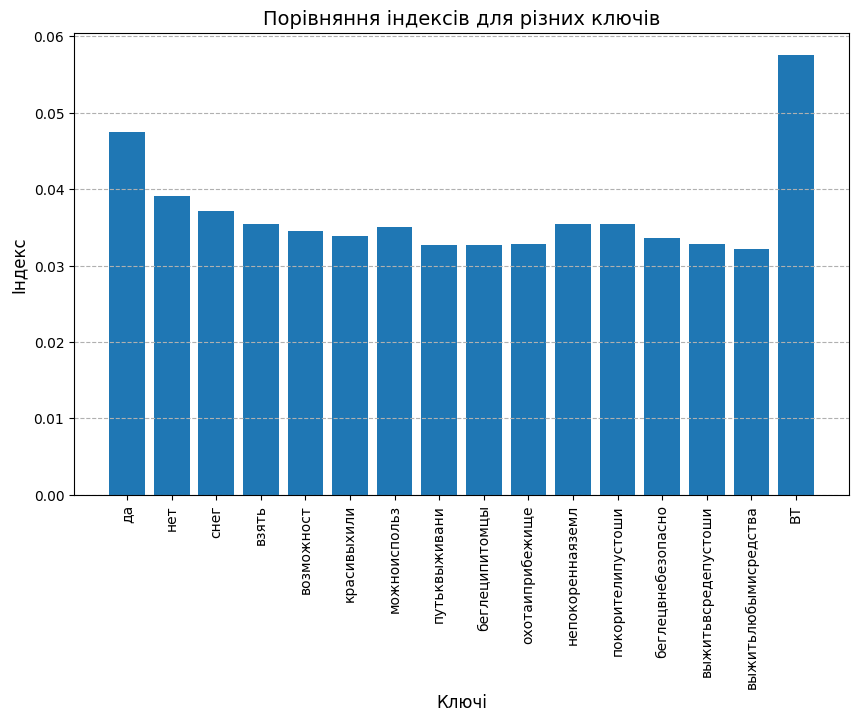

In [66]:
ks = list(idxs.keys())
vs = list(idxs.values())

plt.figure(figsize=(10, 6))
plt.bar(ks, vs)
plt.xlabel("Ключі", fontsize=12)
plt.xticks(rotation=90)
plt.ylabel("Індекс", fontsize=12)
plt.title("Порівняння індексів для різних ключів", fontsize=14)
plt.grid(axis='y', linestyle='--')
plt.show()

РОЗШИФРУВАТИ ТЕКСТ

In [67]:
with open("enc.txt", "r", encoding="utf-8") as origFile:
    text = origFile.read()
    
    with open("enc_cleared.txt", "w", encoding="utf-8") as clearFile:
        text = clear_text(text)
        clearFile.write(text)
        clearFile.close()

    origFile.close()

index = idx(text)

In [68]:
def make_blocks(text: str, l:int) -> list:
    blocks = [""] * l
    i = 0
    for char in text:
        i_block = i % l
        blocks[i_block] += char
        i += 1

    return blocks

def key_l(text:str) -> dict:
    results = {}
    for key_length in range(2, 30):
        blocks = make_blocks(text, key_length)
        i = []
        for block in blocks:
            i.append(idx(block))
        avg = sum(i) / len(i) 
        results[key_length] = avg 
        
    return results

r = key_l(text)



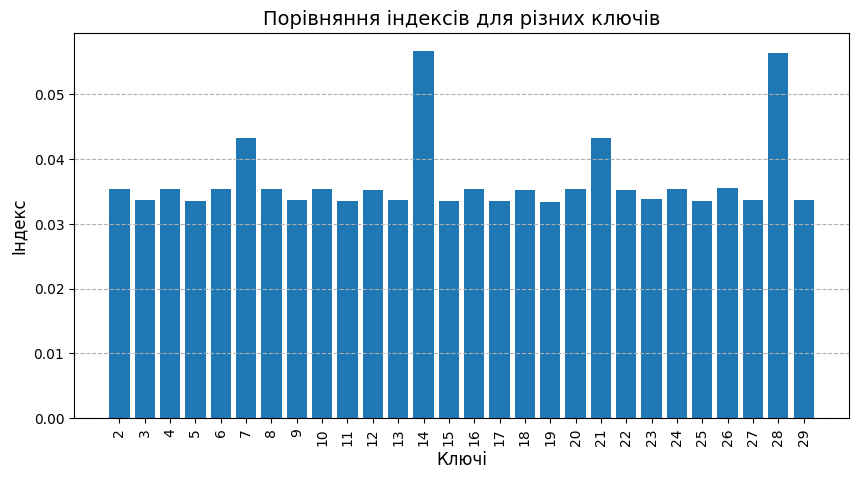

In [69]:
ks = list(r.keys())
ks = [str(k) for k in ks]

vs = list(r.values())

plt.figure(figsize=(10, 5))
plt.bar(ks, vs)
plt.xlabel("Ключі", fontsize=12)
plt.xticks(rotation=90)
plt.ylabel("Індекс", fontsize=12)
plt.title("Порівняння індексів для різних ключів", fontsize=14)
plt.grid(axis='y', linestyle='--')
plt.show()

In [ ]:
def find_key(text: str, l: int) -> list:
    chars = "абвгдежзийклмнопрстуфхцчшщъыьэюя"
    block_size = 14
    blocks = make_blocks(text, block_size)
    key = []

    for block in blocks:
        freq = char_n(block)

        freq_char = max(freq, key=freq.get)
        offset = (chars.index(freq_char) - chars.index('о')) % len(chars)

        key_char = chars[offset]
        key.append([key_char])
    
    return key


key = find_key(text, 14)

for i in key:
    print(i)

def decr(encr:str, key:str) -> str:
    chars = "абвгдежзийклмнопрстуфхцчшщъыьэюя" 
    key = ''.join([key[i % len(key)] for i in range(len(encr))])
    res = []

    for idx in range(len(encr)):
        char = encr[idx]
        i_char = chars.index(char)
        i_key = chars.index(key[idx])
        new_index = (i_char - i_key) % len(chars)
        res.append(chars[new_index])


    str_res = ""
    for i in res:
        str_res += i
    
    return str_res

print(decr(text, 'экомаятникфуко'))


['э']
['б']
['о']
['м']
['а']
['ц']
['т']
['н']
['и']
['к']
['ф']
['у']
['ь']
['о']
итутяувиделмаятникшарвисящийнадолгойнитиопущеннойсвольтыхоравизохронномвеличииописывалколебанияязналноивсякийощутилбыподчарамимернойпульсациичтопериодколебанийопределенотношениемквадратногокорнядлинынитикчислуркотороеиррациональноедляподлунныхумовпредлицомбожественнойрационеукоснительносопрягаетокружностисдиаметрамилюбыхсуществующихкруговкакивремяперемещенияшараотодногополюсакпротивоположномупредставляетрезультаттайнойсоотнесенностинаиболеевневременныхмерединственноститочкикреплениядвойственностиабстрактногоизмерениятроичностичислапискрытойчетверичностиквадратногокорнясовершенствакругаещеязналчтонаконцеотвеснойлиниивосстановленнойотточкикреплениянаходящийсяподмаятникоммагнитныйстабилизаторвоссылаеткомандыжелезномусердцушараиобеспечиваетвечностьдвиженияэтохитраяштукаимеющаяцельюпереборотьсопротивлениематериинокотораянепротиворечитзаконуфуконапротивпомогаетемупроявитьсяпотомучтопомещенныйвпустотулюбойточе